In [1]:
import pandas as pd
import os
import torchaudio
from tqdm.auto import tqdm
from joblib import Parallel, delayed


PATH_DATASET = "birdclef-2022"

path_csv = os.path.join(PATH_DATASET, "train_metadata.csv")
train_meta = pd.read_csv(path_csv)
def getLength(fn):
    fp = os.path.join(PATH_DATASET, "train_audio", fn)
    metadata = torchaudio.info(fp)
    return metadata.num_frames

train_meta['duration'] = Parallel(n_jobs=os.cpu_count())(delayed(getLength)(fn) for fn in tqdm(train_meta["filename"]))
train_meta['duration'] = train_meta['duration']/32000
train_meta

e:\Anaconda3\envs\audio\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████████████████████████████████████████████████████████████████████| 14852/14852 [00:12<00:00, 1223.64it/s]


primary_label                secondary_labels  \
0           afrsil1                              []   
1           afrsil1  ['houspa', 'redava', 'zebdov']   
2           afrsil1                              []   
3           afrsil1                              []   
4           afrsil1                              []   
...             ...                             ...   
14847        zebdov                              []   
14848        zebdov                              []   
14849        zebdov                              []   
14850        zebdov                              []   
14851        zebdov                              []   

                                     type  latitude  longitude  \
0                 ['call', 'flight call']   12.3910    -1.4930   
1                                ['call']   19.8801  -155.7254   
2                        ['call', 'song']   16.2901   -16.0321   
3                  ['alarm call', 'call']   17.0922    54.2958   
4                         ['flight call']   21.4581  -157.7252   
...                                   ...       ...        ...   
14847                   ['adult', 'song']   22.6499   120.2872   
14848  ['adult', 'sex uncertain', 'song']    1.4168   103.7287   
14849  ['adult', 'call', 'sex uncertain']    1.4347   103.7043   
14850                            ['song']    3.3508   101.2451   
14851                            ['song']    3.3508   101.2451   

        scientific_name         common_name              author  \
0       Euodice cantans  African Silverbill           Bram Piot   
1       Euodice cantans  African Silverbill            Dan Lane   
2       Euodice cantans  African Silverbill           Bram Piot   
3       Euodice cantans  African Silverbill      Oscar Campbell   
4       Euodice cantans  African Silverbill       Ross Gallardy   
...                 ...                 ...                 ...   
14847  Geopelia striata          Zebra Dove  Jerome Chie-Jen Ko   
14848  Geopelia striata          Zebra Dove       Kim Chuah Lim   
14849  Geopelia striata          Zebra Dove       Kim Chuah Lim   
14850  Geopelia striata          Zebra Dove    Jelle Scharringa   
14851  Geopelia striata          Zebra Dove    Jelle Scharringa   

                                                 license  rating   time  \
0      Creative Commons Attribution-NonCommercial-Sha...     2.5  08:00   
1      Creative Commons Attribution-NonCommercial-Sha...     3.5  08:30   
2      Creative Commons Attribution-NonCommercial-Sha...     4.0  11:30   
3      Creative Commons Attribution-NonCommercial-Sha...     4.0  11:00   
4      Creative Commons Attribution-NonCommercial-Sha...     3.0  16:30   
...                                                  ...     ...    ...   
14847  Creative Commons Attribution-NonCommercial-Sha...     2.5  08:36   
14848  Creative Commons Attribution-NonCommercial-Sha...     4.0  08:00   
14849  Creative Commons Attribution-NonCommercial-Sha...     4.0  09:00   
14850  Creative Commons Attribution-NonCommercial-Sha...     2.5  11:15   
14851  Creative Commons Attribution-NonCommercial-Sha...     2.5  10:00   

                                     url              filename    duration  
0      https://www.xeno-canto.org/125458  afrsil1/XC125458.ogg   11.102031  
1      https://www.xeno-canto.org/175522  afrsil1/XC175522.ogg   47.020406  
2      https://www.xeno-canto.org/177993  afrsil1/XC177993.ogg   53.760000  
3      https://www.xeno-canto.org/205893  afrsil1/XC205893.ogg  105.482438  
4      https://www.xeno-canto.org/207431  afrsil1/XC207431.ogg    3.395906  
...                                  ...                   ...         ...  
14847  https://www.xeno-canto.org/629769   zebdov/XC629769.ogg   61.056000  
14848  https://www.xeno-canto.org/642415   zebdov/XC642415.ogg   14.856000  
14849  https://www.xeno-canto.org/665873   zebdov/XC665873.ogg   45.576000  
14850  https://www.xeno-canto.org/666194   zebdov/XC666194.ogg   21.551000  

In [2]:
import json
with open(os.path.join(PATH_DATASET, "scored_birds.json")) as fp:
    scored_birds = json.load(fp)

print(scored_birds)

['akiapo', 'aniani', 'apapan', 'barpet', 'crehon', 'elepai', 'ercfra', 'hawama', 'hawcre', 'hawgoo', 'hawhaw', 'hawpet1', 'houfin', 'iiwi', 'jabwar', 'maupar', 'omao', 'puaioh', 'skylar', 'warwhe1', 'yefcan']


# Filter score bird

In [3]:
scoreBird_data = train_meta[train_meta['primary_label'].isin(scored_birds)]

In [44]:
others_data = train_meta.drop(scoreBird_data.index)

In [5]:
scoreBirdGroup = scoreBird_data[['primary_label','duration']].groupby('primary_label').sum()
display(scoreBirdGroup.describe())


duration
count     21.000000
mean    3197.886173
std     6691.693606
min       41.400000
25%      249.048000
50%      761.229969
75%     2460.953656
max    27679.438656

In [6]:
display(scoreBirdGroup.describe())
scoreBird_filter1 = scoreBird_data[scoreBird_data['duration']<400]
scoreBirdGroup1 = scoreBird_filter1[['primary_label','duration']].groupby('primary_label').sum()
display(scoreBirdGroup1.describe())

duration
count     21.000000
mean    3197.886173
std     6691.693606
min       41.400000
25%      249.048000
50%      761.229969
75%     2460.953656
max    27679.438656

duration
count     21.000000
mean    2910.269381
std     5848.103398
min       41.400000
25%      249.048000
50%      761.229969
75%     2300.368812
max    23577.579250

In [7]:
enoughdata = scoreBirdGroup1[scoreBirdGroup1['duration']>1500]
enoughdata

duration
primary_label              
apapan          2588.401375
hawcre          1567.601656
houfin         16043.440125
iiwi            2172.052375
jabwar          4216.554437
skylar         23577.579250
warwhe1         2678.003031
yefcan          2300.368812

In [8]:
scoreBird_filter2 = scoreBird_filter1[(~scoreBird_filter1['primary_label'].isin(enoughdata.index)) | (scoreBird_filter1['rating']>2.5)]

In [9]:
scoreBird_Group2 = scoreBird_filter2[['primary_label','duration']].groupby('primary_label').sum()
scoreBird_Group2show = scoreBird_Group2[scoreBirdGroup1['duration']>1500]
scoreBird_Group2show['old'] = enoughdata['duration']
scoreBird_Group2show

e:\Anaconda3\envs\audio\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


duration           old
primary_label                            
apapan          2431.826687   2588.401375
hawcre          1416.114625   1567.601656
houfin         14967.168531  16043.440125
iiwi            2138.328281   2172.052375
jabwar          4161.602937   4216.554437
skylar         20914.160719  23577.579250
warwhe1         2602.378563   2678.003031
yefcan          1927.495187   2300.368812

In [10]:
enoughdata = scoreBird_Group2[scoreBird_Group2['duration']>1500]
enoughdata

duration
primary_label              
apapan          2431.826687
houfin         14967.168531
iiwi            2138.328281
jabwar          4161.602937
skylar         20914.160719
warwhe1         2602.378563
yefcan          1927.495187

In [11]:
scoreBird_filter3 = scoreBird_filter2[(~scoreBird_filter2['primary_label'].isin(enoughdata.index)) | (scoreBird_filter2['rating']>3.5)]
scoreBird_Group3 = scoreBird_filter3[['primary_label','duration']].groupby('primary_label').sum()
scoreBird_Group3show = scoreBird_Group3[scoreBird_Group2['duration']>1500]
scoreBird_Group3show['old'] = enoughdata['duration']
scoreBird_Group3show

e:\Anaconda3\envs\audio\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


duration           old
primary_label                            
apapan          1787.346219   2431.826687
houfin         10816.904250  14967.168531
iiwi            1437.839625   2138.328281
jabwar          3473.389062   4161.602937
skylar         14905.869250  20914.160719
warwhe1         1778.444500   2602.378563
yefcan          1183.340062   1927.495187

In [12]:
enough_list = ['houfin','skylar','jabwar']

In [13]:
scoreBird_Group3.describe()

duration
count     21.000000
mean    2036.709692
std     3744.534307
min       41.400000
25%      249.048000
50%      761.229969
75%     1437.839625
max    14905.869250

In [14]:
scoreBird_filter3[scoreBird_filter3['primary_label'].isin(enough_list)].describe()

latitude   longitude      rating    duration
count  541.000000  541.000000  541.000000  541.000000
mean    40.493449  -16.921680    4.408503   53.967029
std     13.260105   81.330452    0.444557   50.648230
min    -38.005100 -159.640600    4.000000    1.116000
25%     32.619700  -99.025400    4.000000   19.252250
50%     42.706300    0.940100    4.000000   35.265000
75%     50.257100   19.608600    5.000000   72.907750
max     71.080600  146.291500    5.000000  311.719187

In [15]:
scoreBird_filter4 = scoreBird_filter3[(~scoreBird_filter3['primary_label'].isin(enough_list)) | (scoreBird_filter3['duration']<75)]
scoreBird_Group4 = scoreBird_filter4[['primary_label','duration']].groupby('primary_label').sum()
scoreBird_Group4[scoreBird_Group4.index.isin(enough_list)]

duration
primary_label             
houfin         5268.846500
jabwar         1493.639000
skylar         6157.016781

In [16]:
enough_list = ['houfin','skylar']

In [17]:
scoreBird_filter5 = scoreBird_filter4[(~scoreBird_filter4['primary_label'].isin(enough_list)) | (scoreBird_filter4['duration']<30)]
scoreBird_Group5 = scoreBird_filter5[['primary_label','duration']].groupby('primary_label').sum()
scoreBird_Group5[scoreBird_Group5.index.isin(enough_list)]

duration
primary_label             
houfin         1353.649906
skylar         2099.726187

# slice data

In [18]:
scoreBird_filter5['segmentNum'] = (scoreBird_filter5['duration']//5) + (scoreBird_filter5['duration']%5 > 3)

e:\Anaconda3\envs\audio\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
scoreBird_filter5['segmentNum'].sum()

3651.0

In [20]:
scoreBird_Group6 = scoreBird_filter5[['primary_label','segmentNum']].groupby('primary_label').sum()
scoreBird_Group6.describe()

segmentNum
count   21.000000
mean   173.857143
std    127.541870
min      8.000000
25%     50.000000
50%    151.000000
75%    281.000000
max    407.000000

In [21]:
scoreBird_Group6.sum()

segmentNum    3651.0
dtype: float64

In [22]:
PATH_DATASET

'birdclef-2022'

In [33]:
path_temp = os.path.join(PATH_DATASET, "train_audio",scoreBird_filter5.iloc[4].filename)
path_temp

'birdclef-2022\\train_audio\\akiapo/XC124801.ogg'

In [34]:
wave,sr = torchaudio.load(path_temp)

In [35]:
wave= wave.mean(0)

In [37]:
import matplotlib.pyplot as plt
import torch


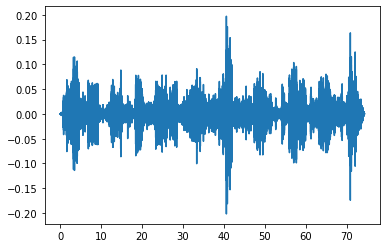

In [38]:
plt.plot(torch.Tensor(range(len(wave)))/sr,wave)

In [39]:
import IPython.display as ipd
ipd.Audio(wave,rate=sr)

# Get Other data

In [47]:
others_data_Group1 = others_data[['primary_label','duration']].groupby('primary_label').sum()
others_data_Group1.describe()

duration
count    131.000000
mean    4724.141539
std     7771.878061
min       21.106906
25%      572.092109
50%     1681.222125
75%     6116.324125
max    52129.719875

In [54]:
filer_orther_data = others_data[others_data['rating']>2.5]
others_data_Group2 = filer_orther_data[['primary_label','duration']].groupby('primary_label').sum()
others_data_Group2.describe()

duration
count    131.000000
mean    4008.100423
std     6565.458733
min       20.914938
25%      502.845766
50%     1480.275562
75%     5189.451953
max    48913.329813

In [59]:
others_data_Group3 = filer_orther_data[['primary_label','duration']].groupby('primary_label')

In [118]:
filer_orther_data2 = pd.DataFrame([],columns=filer_orther_data.columns)
for group_index in others_data_Group3.groups.keys():
    index = others_data_Group3.groups[group_index]
    tempData = filer_orther_data.loc[index].sort_values('duration').head(4)
    filer_orther_data2 = filer_orther_data2.append(tempData)
    

In [159]:
import random

@torch.no_grad()
def slice_data(
    data_path: str,
    birdName:str,
    fileName:str,
    reduce_noise: bool = False,
    frame_size: int = 5,
    frame_step: int = 5,
    n_jobs: int = 1,
    channel: int = 0,
    device = "cpu",
    batch_size=5,
):
    pathExport = os.path.join('./', "Slice_data_score", birdName)
    os.makedirs(pathExport, exist_ok=True)
    fname = os.path.join(data_path, "train_audio", fileName)
    
    waveform, sample_rate = torchaudio.load(fname)
    print(waveform)
    # Change singal to mono
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, axis=0, keepdim=True)
    # Reduce noise
    if reduce_noise:
        waveform = torch.tensor(nr.reduce_noise(
            y=waveform,
            sr=sample_rate,
            use_tqdm=True,
            n_jobs=n_jobs,
        ))
        
    step = int(frame_step * sample_rate)
    lenSamples = waveform.size()[-1]
    
    if lenSamples < step:
        waveform = torch.nn.functional.pad(waveform, (0,step-lenSamples), mode='constant', value=0.0)
    else:
        index = random.randint(0,lenSamples-step)
        waveform = waveform[:,index:index+step]
    output_path = fileName.replace('.ogg','_0.ogg')
    torchaudio.save("Slice_data_score/" + output_path, waveform, sample_rate)


In [161]:
train_meta_final = filer_orther_data2

Parallel(n_jobs=os.cpu_count(),verbose=0)(
    delayed(slice_data)(PATH_DATASET,row.primary_label,row.filename,reduce_noise=False,frame_step=5) for index,row in tqdm(train_meta_final.iterrows(),total=train_meta_final.shape[0]))

print('515')

100%|████████████████████████████████████████████████████████████████████████████████| 515/515 [00:05<00:00, 85.92it/s]


515


In [165]:
import torch
import math
import os
import noisereduce as nr

@torch.no_grad()
def slice_data(
    data_path: str,
    birdName:str,
    fileName:str,
    reduce_noise: bool = False,
    frame_size: int = 5,
    frame_step: int = 5,
    n_jobs: int = 1,
    channel: int = 0,
    device = "cpu",
    batch_size=5,
):
    pathExport = os.path.join('./', "Slice_data_score", birdName)
    os.makedirs(pathExport, exist_ok=True)
    fname = os.path.join(data_path, "train_audio", fileName)
    
    waveform, sample_rate = torchaudio.load(fname)
       
    # Change singal to mono
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, axis=0, keepdim=True)
    # Reduce noise
    if reduce_noise:
        waveform = torch.tensor(nr.reduce_noise(
            y=waveform,
            sr=sample_rate,
            use_tqdm=True,
            n_jobs=n_jobs,
        ))
        
    step = int(frame_step * sample_rate)
    size = int(frame_size * sample_rate)
    lenSamples = waveform.size()[-1]
    
    if lenSamples < sample_rate*frame_size:
        waveform = torch.nn.functional.pad(waveform, (0,sample_rate*frame_size-lenSamples), mode='constant', value=0.0)
    else:
        tail_len = (lenSamples-size)%step
        if tail_len > step*0.6:
            waveform = torch.nn.functional.pad(waveform, (0,step-tail_len), mode='constant', value=0.0)
        else:
            waveform = waveform[:,0:-tail_len]

    retList = []
    for i in range(math.floor((waveform.size()[-1] - size) / step)+1):
        begin = i * step
        output_path = fileName.replace('.ogg','') + '_' + str(i) + '.ogg'
        retList.append((fileName,i))
#         print(output_path)
        frame = waveform[:,begin:begin + size]
        torchaudio.save("Slice_data_score/" + output_path, frame, sample_rate)
        
    return retList


In [166]:
train_meta_final = scoreBird_filter5
SegInfo = Parallel(n_jobs=os.cpu_count(),verbose=0)(
    delayed(slice_data)(PATH_DATASET,row.primary_label,row.filename,frame_step=5) for index,row in tqdm(train_meta_final.iterrows(),total=train_meta_final.shape[0]))

100%|████████████████████████████████████████████████████████████████████████████████| 525/525 [00:40<00:00, 13.07it/s]


In [167]:
segList = []
for group in SegInfo:
    for d in group:
        segList.append(d)
        
train_meta_final_temp = train_meta_final[['primary_label','secondary_labels','type','rating','filename','duration','segmentNum']]
Filter_Clip_data = pd.merge(train_meta_final_temp,pd.DataFrame(segList,columns=['filename','seg_index']),how='outer',on='filename')
Filter_Clip_data

primary_label              secondary_labels  \
0           akiapo  ['apapan', 'hawama', 'iiwi']   
1           akiapo  ['apapan', 'hawama', 'iiwi']   
2           akiapo  ['apapan', 'hawama', 'iiwi']   
3           akiapo  ['apapan', 'hawama', 'iiwi']   
4           akiapo  ['apapan', 'hawama', 'iiwi']   
...            ...                           ...   
3655        yefcan                            []   
3656        yefcan                            []   
3657        yefcan                            []   
3658        yefcan                            []   
3659        yefcan                            []   

                                                type  rating  \
0                                           ['song']     4.5   
1                                           ['song']     4.5   
2                                           ['song']     4.5   
3                                           ['song']     4.5   
4                                           ['song']     4.5   
...                                              ...     ...   
3655  ['adult', 'male', 'mimicry/imitation', 'song']     4.0   
3656  ['adult', 'male', 'mimicry/imitation', 'song']     4.0   
3657  ['adult', 'male', 'mimicry/imitation', 'song']     4.0   
3658              ['adult', 'sex uncertain', 'song']     4.0   
3659              ['adult', 'sex uncertain', 'song']     4.0   

                 filename  duration  segmentNum  seg_index  
0     akiapo/XC122399.ogg    29.328         6.0          0  
1     akiapo/XC122399.ogg    29.328         6.0          1  
2     akiapo/XC122399.ogg    29.328         6.0          2  
3     akiapo/XC122399.ogg    29.328         6.0          3  
4     akiapo/XC122399.ogg    29.328         6.0          4  
...                   ...       ...         ...        ...  
3655  yefcan/XC648484.ogg    73.639        15.0         12  
3656  yefcan/XC648484.ogg    73.639        15.0         13  
3657  yefcan/XC648484.ogg    73.639        15.0         14  
3658  yefcan/XC664188.ogg     8.542         2.0          0  
3659  yefcan/XC664188.ogg     8.542         2.0          1  

[3660 rows x 8 columns]

In [172]:
Filter_Clip_data

primary_label              secondary_labels  \
0           akiapo  ['apapan', 'hawama', 'iiwi']   
1           akiapo  ['apapan', 'hawama', 'iiwi']   
2           akiapo  ['apapan', 'hawama', 'iiwi']   
3           akiapo  ['apapan', 'hawama', 'iiwi']   
4           akiapo  ['apapan', 'hawama', 'iiwi']   
...            ...                           ...   
3655        yefcan                            []   
3656        yefcan                            []   
3657        yefcan                            []   
3658        yefcan                            []   
3659        yefcan                            []   

                                                type  rating  \
0                                           ['song']     4.5   
1                                           ['song']     4.5   
2                                           ['song']     4.5   
3                                           ['song']     4.5   
4                                           ['song']     4.5   
...                                              ...     ...   
3655  ['adult', 'male', 'mimicry/imitation', 'song']     4.0   
3656  ['adult', 'male', 'mimicry/imitation', 'song']     4.0   
3657  ['adult', 'male', 'mimicry/imitation', 'song']     4.0   
3658              ['adult', 'sex uncertain', 'song']     4.0   
3659              ['adult', 'sex uncertain', 'song']     4.0   

                 filename  duration  segmentNum  seg_index  
0     akiapo/XC122399.ogg    29.328         6.0          0  
1     akiapo/XC122399.ogg    29.328         6.0          1  
2     akiapo/XC122399.ogg    29.328         6.0          2  
3     akiapo/XC122399.ogg    29.328         6.0          3  
4     akiapo/XC122399.ogg    29.328         6.0          4  
...                   ...       ...         ...        ...  
3655  yefcan/XC648484.ogg    73.639        15.0         12  
3656  yefcan/XC648484.ogg    73.639        15.0         13  
3657  yefcan/XC648484.ogg    73.639        15.0         14  
3658  yefcan/XC664188.ogg     8.542         2.0          0  
3659  yefcan/XC664188.ogg     8.542         2.0          1  

[3660 rows x 8 columns]

In [176]:
filer_orther_data2['segmentNum'] = 1
filer_orther_data2['seg_index'] = 0

In [179]:
Filter_Clip_data.append(filer_orther_data2).to_csv('Filter_Clip_Major_Score_Data.csv',index=False)